# Predicting diabetes status using NHANES

[DSLC stages]: Analysis



The following code sets up the libraries and creates cleaned and pre-processed training, validation and test data that we will use in this document.

In [60]:
import pandas as pd
import numpy as np
import plotly.express as px

from functions.load_diabetes_data import load_diabetes_data
# load the diabetes data

train_data = pd.read_csv('train_data.csv')
val_data = pd.read_csv('val_data.csv')
test_data = pd.read_csv('test_data.csv')
imputed_2017 = pd.read_csv('imputed_2017.csv')
not_imputed_2017 = pd.read_csv('not_imputed_2017.csv')

pd.set_option('display.max_columns', None)

print(train_data.shape)
print(test_data.shape)
print(val_data.shape)
print(imputed_2017.shape)

(44969, 38)
(5622, 38)
(5621, 38)
(25507, 38)


In [39]:
train_data.head(10)

,house_family_person_id,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes,doctor_recommend_exercise,moderate_physical_activity,vigorous_physical_activity,alcohol_past_year,region,marital_status,prediabetes,stroke,told_reduce_fat,weight_loss_program,hours_sleep,blood_sugar,race,angina_pectoris,heart_attack,kidney_weak,functional_limits,arthritis,cannot_afford_medication,diabetes
0,1.743801e+08,62.000000,1.000000,1.0,0.0,173.800000,2629.200000,64.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.0,3.200000,2.000000,4.000000,0.0,1.0,1.0,0.0,4.000000,1.0,1.000000,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0
1,5.660601e+08,65.000000,1.000000,0.0,1.0,181.400000,4325.000000,68.600000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0,2.000000,0.000000,5.000000,0.0,0.0,1.0,0.0,12.000000,1.0,0.000000,1.0,1.0,1.0,1.000000,0.0,0.000000,1.0
2,5.233601e+08,81.000000,0.000000,1.0,0.0,193.000000,2959.000000,60.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.800000,2.000000,2.000000,0.0,0.0,1.0,0.0,10.000000,1.0,1.000000,0.0,0.0,0.0,1.000000,1.0,0.000000,1.0
3,2.488236e+08,84.614112,0.970316,0.0,0.0,201.098296,2974.529909,68.940633,1.000000,0.970316,0.970316,1.000000,1.000000,0.207786,0.0,0.970316,2.970316,7.910949,0.0,0.0,1.0,0.0,8.000000,1.0,0.000000,0.0,0.0,0.0,1.000000,1.0,0.000000,1.0
4,1.730101e+06,36.000000,1.000000,0.0,0.0,175.000000,2584.000000,69.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,3.000000,1.000000,0.0,0.0,0.0,0.0,7.000000,2.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
5,2.979701e+08,68.000000,0.000000,1.0,0.0,165.000000,2582.000000,67.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,2.0,1.400000,1.000000,1.000000,0.0,0.0,1.0,0.0,8.000000,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0
6,7.390101e+06,49.000000,1.000000,1.0,0.0,198.000000,2970.000000,67.400000,1.000000,0.000000,0.000000,1.000000,0.000000,7.000000,1.0,3.000000,2.000000,6.000000,0.0,0.0,1.0,1.0,8.000000,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
7,5.333501e+08,58.000000,0.000000,1.0,0.0,190.000000,2976.000000,67.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,9.000000,1.0,0.000000,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0
8,5.642332e+08,57.258101,0.000000,1.0,0.0,154.466909,2764.787069,62.590141,0.897535,0.000000,0.000000,0.897535,0.102465,4.102465,0.0,1.640986,2.000000,1.000000,0.0,0.0,0.0,0.0,6.204929,1.0,0.307394,0.0,0.0,0.0,0.897535,0.0,0.897535,1.0
9,4.275001e+08,68.000000,0.000000,1.0,0.0,150.000000,2656.000000,63.000000,1.000000,0.000000,0.000000,1.000000,0.000000,5.000000,0.0,3.000000,3.000000,5.000000,0.0,0.0,0.0,0.0,5.000000,1.0,2.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0


In [55]:
train_data['diabetes'].value_counts()

diabetes
0.0    23277
1.0    23132
Name: count, dtype: int64

In [61]:
X_test_2017 = imputed_2017.drop(['diabetes', 'house_family_person_id'], axis=1)  # Ensure the test data has the same features
y_test_2017 = imputed_2017['diabetes']

X_test = test_data.drop(['diabetes', 'house_family_person_id'], axis=1)  # Ensure the test data has the same features
y_test = test_data['diabetes']

X_train = train_data.drop(['diabetes', 'house_family_person_id'], axis=1)  # Ensure the test data has the same features
y_train = train_data['diabetes']

X_val = val_data.drop(['diabetes', 'house_family_person_id'], axis=1)  # Ensure the test data has the same features
y_val = val_data['diabetes']

In [ ]:
X_test_2017.head()

In [81]:
'''from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming the target variable is named 'diabetes' and is binary (0 or 1)
#X_train = train_data.drop(['diabetes', 'house_family_person_id'], axis=1)
#y_train = train_data['diabetes']

#X_val = val_data.drop(['diabetes', 'house_family_person_id'], axis=1)
#y_val = val_data['diabetes']
# Drop those columns
#X_val = X_val.drop(columns=columns_to_drop.values[1:])

# Optional: Check for missing values
#print(X_train.isnull().sum())
#print(X_val.isnull().sum())

# Scale the features
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)

xgb_clf = XGBClassifier(
    n_estimators=2000, 
    learning_rate=0.005, 
    eval_metric='aucpr', 
    max_depth=5,
    reg_alpha=5,  # Increased L1 regularization
    reg_lambda=15  # Increased L2 regularization
)
#xgb_clf = XGBClassifier(n_estimators=1000, learning_rate=0.01, eval_metric='aucpr', max_depth=3)
xgb_clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

y_train_pred = xgb_clf.predict(X_train)

# Evaluate the model
print("Train")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

y_val_pred = xgb_clf.predict(X_val)

# Evaluate the model
print("VAL")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

y_test_pred = xgb_clf.predict(X_test)

# Evaluate the model
print("TEST")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

#X_test_2017 = X_test_2017.drop(columns=columns_to_drop.values[1:])
y_pred_2017 = xgb_clf.predict(X_test_2017)
y_pred_probs = xgb_clf.predict_proba(X_test_2017)[:, 1]
threshold = 0.35
y_pred_custom = (y_pred_probs >= threshold).astype(int)  # Apply custom threshold
print()
print(confusion_matrix(y_test_2017, y_pred_custom))
print(classification_report(y_test_2017, y_pred_custom))

print("TEST 2017")
print("Accuracy:", accuracy_score(y_test_2017, y_pred_2017))
print("Confusion Matrix:\n", confusion_matrix(y_test_2017, y_pred_2017))
print("Classification Report:\n", classification_report(y_test_2017, y_pred_2017))

Train
Accuracy: 0.9623518423803065
Confusion Matrix:
 [[22027   456]
 [ 1237 21249]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.96     22483
         1.0       0.98      0.94      0.96     22486

    accuracy                           0.96     44969
   macro avg       0.96      0.96      0.96     44969
weighted avg       0.96      0.96      0.96     44969

VAL
Accuracy: 0.9578366838640812
Confusion Matrix:
 [[2722   67]
 [ 170 2662]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      2789
         1.0       0.98      0.94      0.96      2832

    accuracy                           0.96      5621
   macro avg       0.96      0.96      0.96      5621
weighted avg       0.96      0.96      0.96      5621

TEST
Accuracy: 0.9596229099964425
Confusion Matrix:
 [[2769   65]
 [ 162 2626]]
Classification Report:
               precision    rec

In [85]:
'''threshold = 0.35
y_pred_custom = (y_pred_probs >= threshold).astype(int)  # Apply custom threshold
print()
print(confusion_matrix(y_test_2017, y_pred_custom))
print(classification_report(y_test_2017, y_pred_custom))


[[21332  1394]
 [ 1318  1463]]
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     22726
         1.0       0.51      0.53      0.52      2781

    accuracy                           0.89     25507
   macro avg       0.73      0.73      0.73     25507
weighted avg       0.89      0.89      0.89     25507



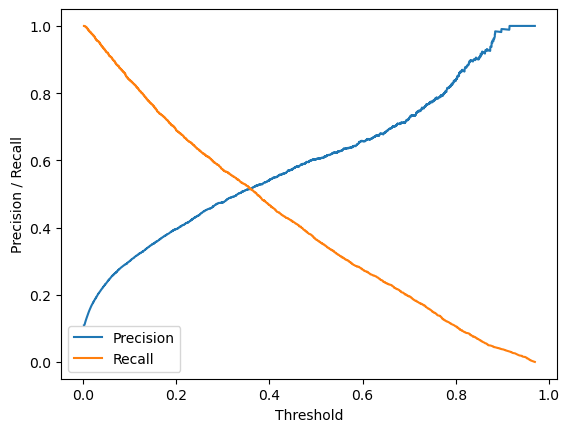

In [82]:
'''from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test_2017, y_pred_probs)

# Plot the Precision-Recall curve
import matplotlib.pyplot as plt

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Precision / Recall")
plt.legend(loc="best")
plt.show()


In [ ]:
'''from sklearn.metrics import f1_score

# Initialize best score
best_threshold = 0.5
best_f1 = 0

# Test different thresholds
for thresh in thresholds:
    y_pred_thresh = (y_pred_probs >= thresh).astype(int)
    f1 = f1_score(y_test_2017, y_pred_thresh)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = thresh

print(f"Best F1-Score: {best_f1} at Threshold: {best_threshold}")


In [86]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Initialize the LightGBM classifier
lgb_clf = lgb.LGBMClassifier(
    n_estimators=2000,      # Number of trees (boosting rounds)
    learning_rate=0.005,     # Learning rate
    is_unbalance=True,      # Set to True if your data is imbalanced
    num_leaves=31,          # Maximum number of leaves in one tree
    max_depth=-1            # Unlimited tree depth
)

# Train the model on the training data
lgb_clf.fit(X_train, y_train)


# Make predictions
y_train_pred = lgb_clf.predict(X_train)

# Evaluate the model
print("Train")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

y_val_pred = lgb_clf.predict(X_val)

# Evaluate the model
print("VAL")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

y_test_pred = lgb_clf.predict(X_test)

# Evaluate the model
print("TEST")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", b)
print("Classification Report:\n", classification_report(y_test, y_test_pred))

#X_test_2017 = X_test_2017.drop(columns=columns_to_drop.values[1:])
y_pred_2017 = lgb_clf.predict(X_test_2017)

print("TEST 2017")
print("Accuracy:", accuracy_score(y_test_2017, y_pred_2017))
print("Confusion Matrix:\n", confusion_matrix(y_test_2017, y_pred_2017))
print("Classification Report:\n", classification_report(y_test_2017, y_pred_2017))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22486, number of negative: 22483
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6403
[LightGBM] [Info] Number of data points in the train set: 44969, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500033 -> initscore=0.000133
[LightGBM] [Info] Start training from score 0.000133
Train
Accuracy: 0.9694900931752986
Confusion Matrix:
 [[22209   274]
 [ 1098 21388]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     22483
         1.0       0.99      0.95      0.97     22486

    accuracy                           0.97     44969
   macro avg       0.97      0.97    

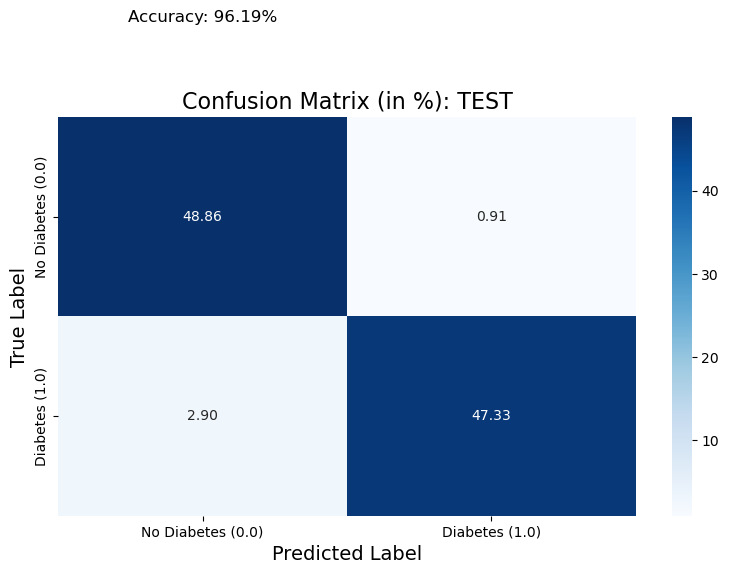

In [118]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


y_test_pred = lgb_clf.predict(X_test)

# Calculate confusion matrix and normalize it to percentages
cm_values = confusion_matrix(y_test, y_test_pred) / y_test.shape[0] * 100

# Create the confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm_values, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=['No Diabetes (0.0)', 'Diabetes (1.0)'], 
            yticklabels=['No Diabetes (0.0)', 'Diabetes (1.0)'])

# Set plot labels and title
plt.title('Confusion Matrix (in %): TEST', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

# Display the accuracy as a percentage
accuracy = (cm_values[0, 0] + cm_values[1, 1])
plt.text(0.5, -0.5, f'Accuracy: {accuracy:.2f}%', fontsize=12, ha='center', va='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()


In [133]:
from sklearn.metrics import roc_auc_score
# Get predicted probabilities for the positive class (1)
y_pred_prob = lgb_clf.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Add the risk factor to the test dataset (optional: combine X_test with risk scores)
risk_scores = pd.DataFrame({'Risk_Score': y_pred_prob}, index=X_test.index)
X_test_with_risk = pd.concat([X_test, risk_scores], axis=1)

# Example: Calculate and print the AUC score (optional performance evaluation)
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {auc_score:.4f}")

# Display the first few rows with risk scores
print(X_test_with_risk.head())


AUC Score: 0.9009
   age  smoker  sex  coronary_heart_disease  weight     bmi  height  \
0   56     1.0    1                     0.0   175.0  2827.0    66.0   
1   69     0.0    1                     0.0   154.0  2413.0    67.0   
2   23     0.0    1                     0.0   145.0  2570.0    63.0   
3   57     0.0    1                     0.0   180.0  3188.0    63.0   
4   69     0.0    0                     0.0   160.0  2297.0    70.0   

   hypertension  heart_condition  cancer  family_history_diabetes  \
0           0.0              0.0     0.0                      1.0   
1           1.0              0.0     0.0                      1.0   
2           0.0              0.0     0.0                      0.0   
3           1.0              1.0     1.0                      1.0   
4           0.0              0.0     1.0                      0.0   

   doctor_recommend_exercise  moderate_physical_activity  \
0                        0.0                         0.0   
1                   

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Train the logistic regression model
model = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', class_weight='balanced')
model.fit(X_train, y_train)

# Validate the model
y_val_pred = model.predict(X_val)

# Evaluate the model
print("VAL")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# To predict on the test data
#X_test = test_data.drop(['diabetes', 'house_family_person_id'], axis=1)  # Ensure the test data has the same features
#y_test = test_data['diabetes']
#X_test_scaled = scaler.transform(X_test)

y_test_pred = model.predict(X_test)

# Evaluate the model
print("TEST")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

VAL
Accuracy: 0.8466465041807507
Confusion Matrix:
 [[2346  458]
 [ 404 2413]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.84      0.84      2804
         1.0       0.84      0.86      0.85      2817

    accuracy                           0.85      5621
   macro avg       0.85      0.85      0.85      5621
weighted avg       0.85      0.85      0.85      5621

TEST
Accuracy: 0.8456065457132693
Confusion Matrix:
 [[2291  507]
 [ 361 2463]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      2798
         1.0       0.83      0.87      0.85      2824

    accuracy                           0.85      5622
   macro avg       0.85      0.85      0.85      5622
weighted avg       0.85      0.85      0.85      5622



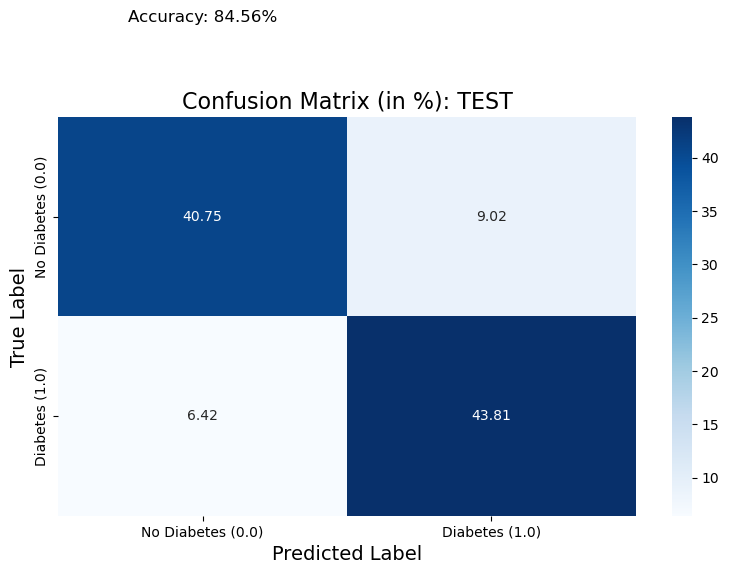

In [121]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_test_pred = model.predict(X_test)

# Calculate confusion matrix and normalize it to percentages
cm_values = confusion_matrix(y_test, y_test_pred) / y_test.shape[0] * 100

# Create the confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm_values, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=['No Diabetes (0.0)', 'Diabetes (1.0)'], 
            yticklabels=['No Diabetes (0.0)', 'Diabetes (1.0)'])

# Set plot labels and title
plt.title('Confusion Matrix (in %): TEST', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

# Display the accuracy as a percentage
accuracy = (cm_values[0, 0] + cm_values[1, 1])
plt.text(0.5, -0.5, f'Accuracy: {accuracy:.2f}%', fontsize=12, ha='center', va='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()

In [79]:
# To predict on the test data
#model = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
#model.fit(X_test_2017, y_test_2017)
#X_test_2017 = imputed_2017.drop(['diabetes', 'house_family_person_id'], axis=1)  # Ensure the test data has the same features
#y_test_2017 = imputed_2017['diabetes']
#X_test_scaled_2017 = scaler.transform(X_test_2017)

y_test_pred_2017 = model.predict(X_test_2017)

# Evaluate the model
print("TEST")
print("Accuracy:", accuracy_score(y_test_2017, y_test_pred_2017))
print("Confusion Matrix:\n", confusion_matrix(y_test_2017, y_test_pred_2017))
print("Classification Report:\n", classification_report(y_test_2017, y_test_pred_2017))

TEST
Accuracy: 0.8342023758184028
Confusion Matrix:
 [[19694  3032]
 [ 1197  1584]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.87      0.90     22726
         1.0       0.34      0.57      0.43      2781

    accuracy                           0.83     25507
   macro avg       0.64      0.72      0.67     25507
weighted avg       0.88      0.83      0.85     25507

